# Red Wine Quality


Manuel Lopez Videla Garcia

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.linalg import inv

import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import cufflinks as cf

### 1. Data Analysis

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine, Reference from [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
).9

In [ ]:
# Load the dataset
data = pd.read_csv('data/winequality-red.csv')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [ ]:
# Basic information
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.00000

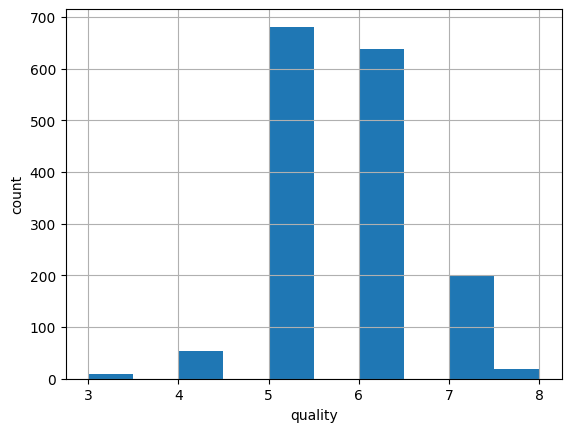

In [ ]:
data['quality'].hist()
plt.xlabel('quality')
plt.ylabel('count')
plt.show()

<Figure size 1200x600 with 0 Axes>

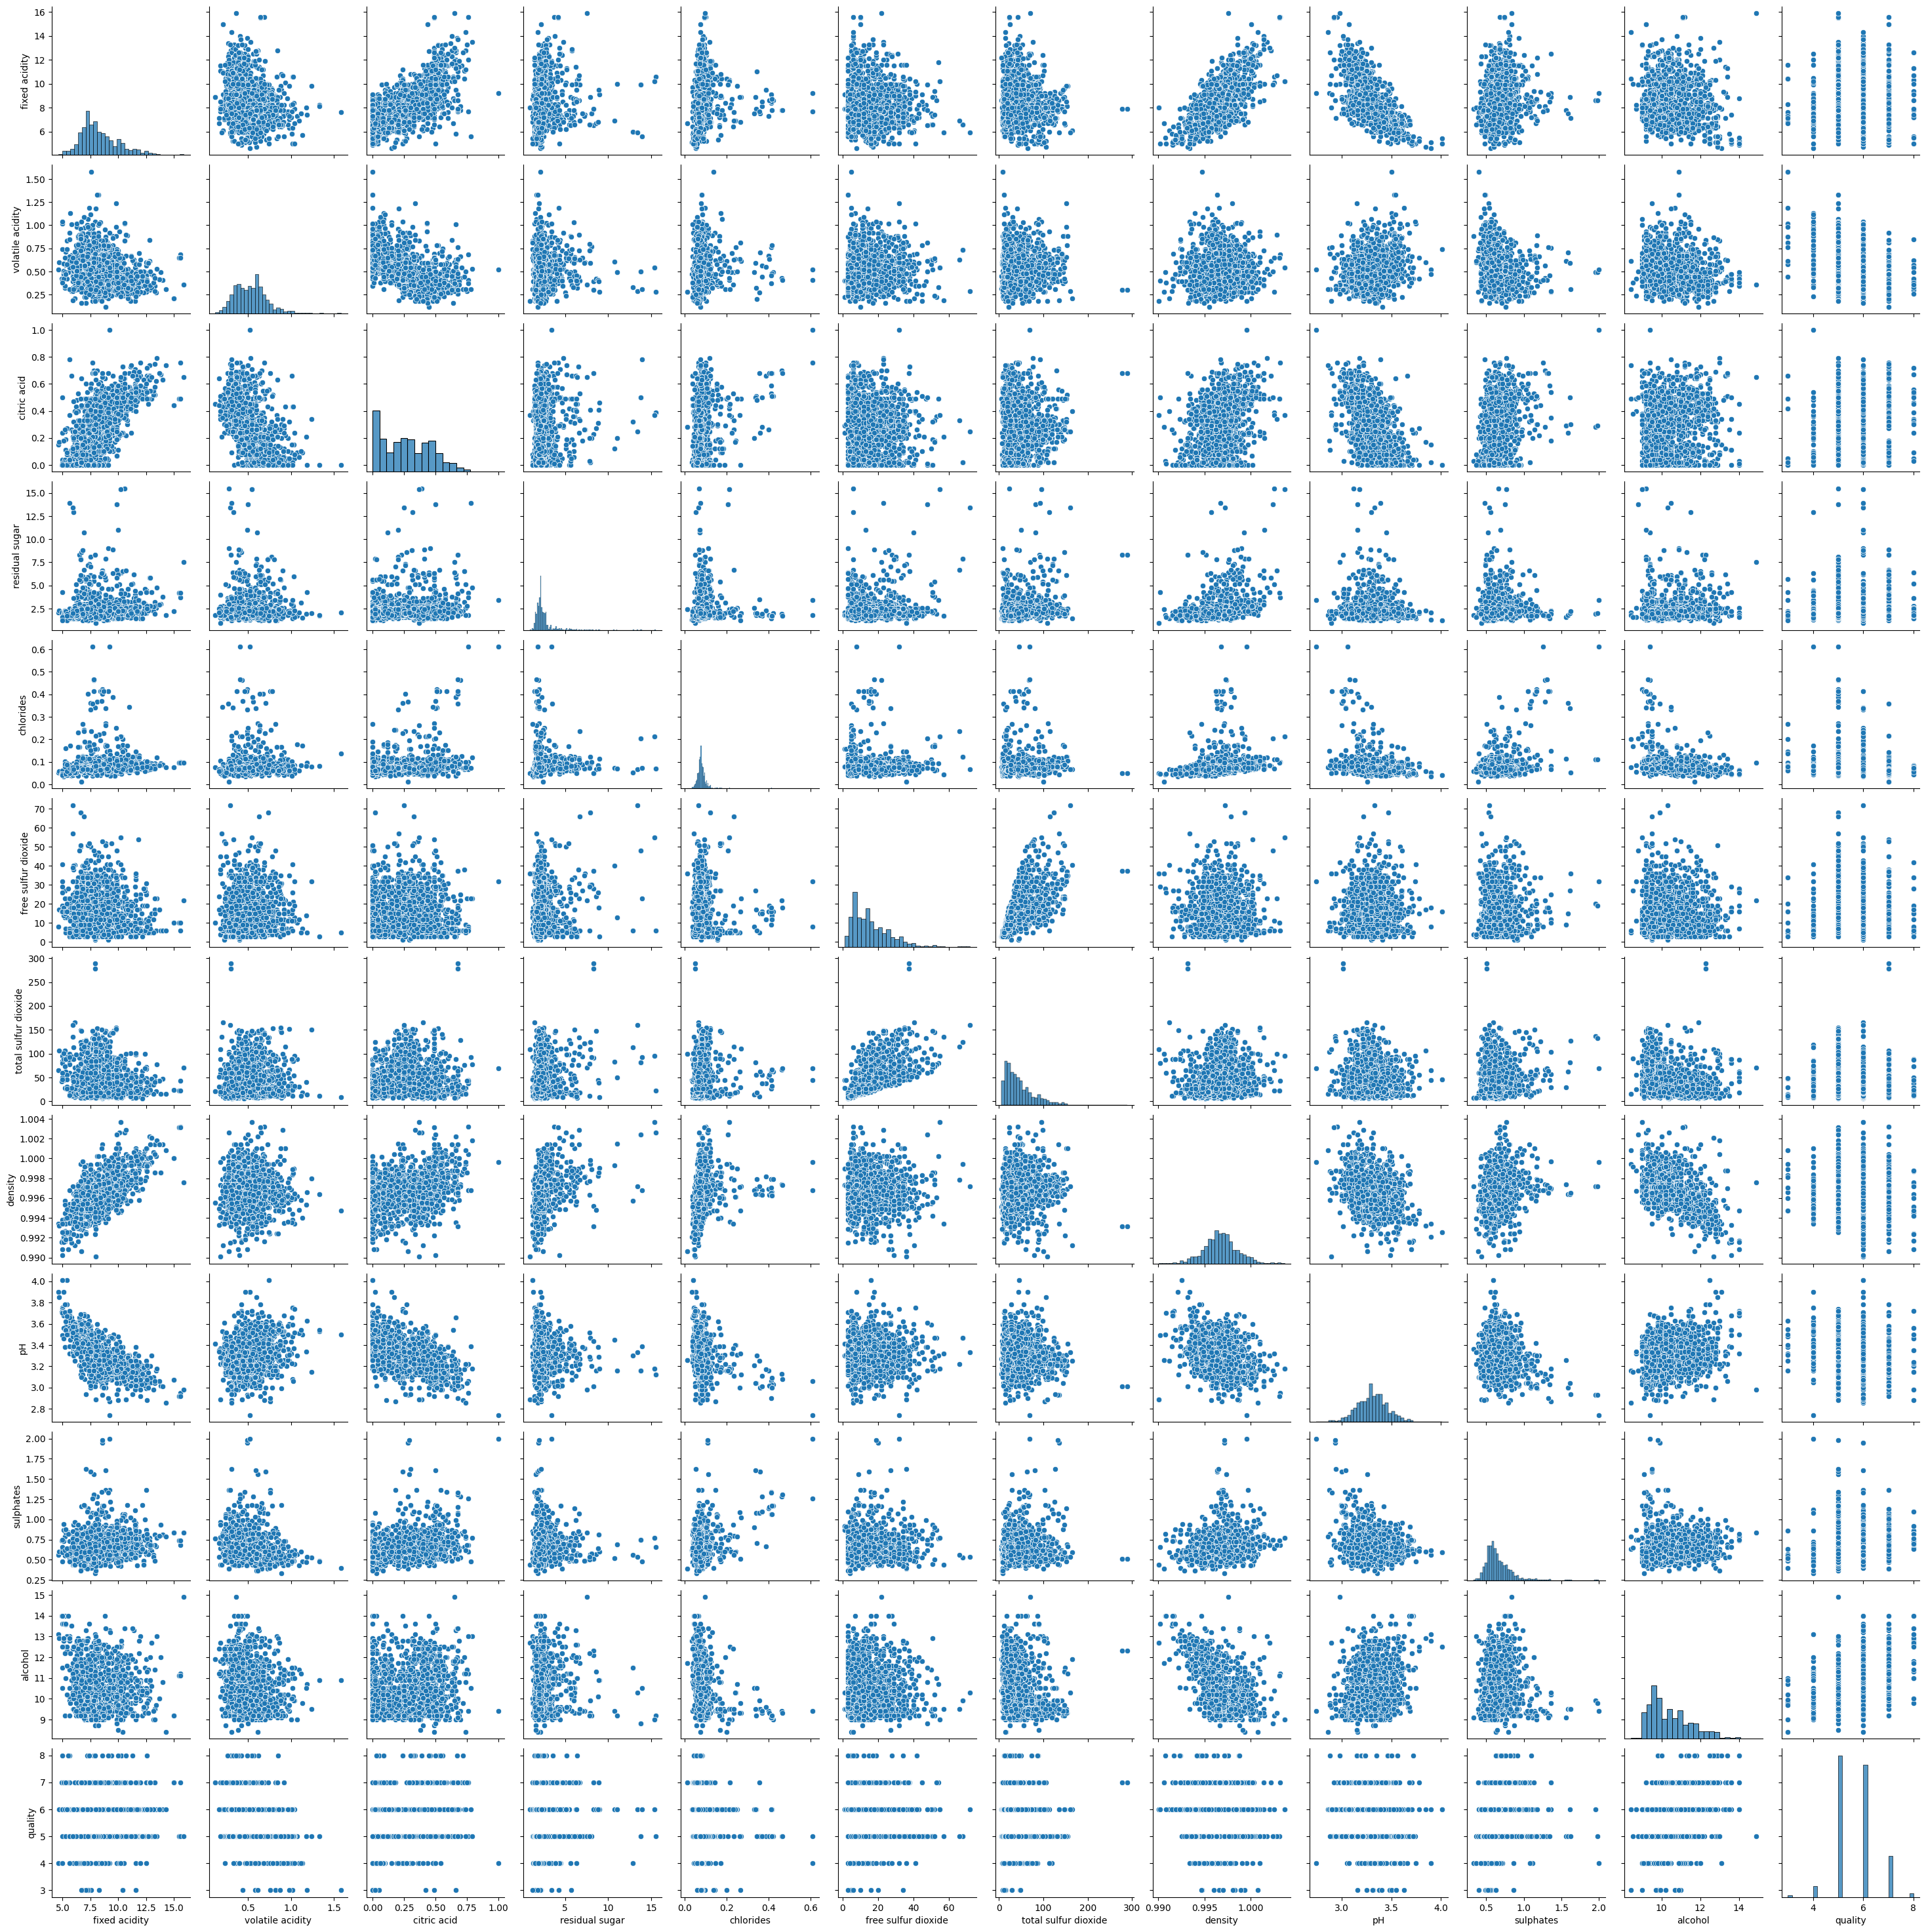

In [ ]:
plt.figure(figsize = (12,6))
sns.pairplot(data)
plt.show()

Input variables
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

In [ ]:
# Feature-Target Split
X = data.drop(columns='quality')
y = data['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 2.Regression (Linear, Logistic, Multilinear)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred_classes = np.round(lr_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, lr_pred_classes)
print(f"Accuracy: {accuracy}")
print("Mean Squared Error:", mean_squared_error(y_test, lr_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R-squared:", r2_score(y_test, lr_pred))
print("\nLinear Regression: \n",lr_pred)
#print("Accuracy:", accuracy_score(y_test_log, lr_pred))


Accuracy: 0.571875
Mean Squared Error: 0.39002514396395493
Root Mean Squared Error: 0.624519930798013
R-squared: 0.4031803412796219

Linear Regression: 
 [5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032 6.13959677 5.23386892
 5.54991474 5.25825299 5.44810502 6.46828999 5.15018088 5.59105157
 6.5560658  5.32255751 5.3918385  5.19610791 5.94475739 6.36197631
 5.35484893 5.41907575 6.36483321 5.35121573 5.172392   6.16987311
 5.25263058 5.50657406 5.75422105 5.39101712 5.45331031 5.02757499
 6.16173243 5.68661555 5.6486077  6.165471   5.52872593 5.24414488
 6.17724727 5.16500868 5.87598332 5.81317121 6.41982782 5.6059474
 5.15232137 5.55634632 5.16044852 5.10449459 5.58371721 6.33425313
 4.95134985 4.98364804 6.01041999 5.40809804 5.83802638 5.2486897
 5.60717482 5.96630957 5.27619063 5.30380113 6.4949309  5.42033967
 6.34273471 5.24618531 6.41317317 5.31237924 6.41746963 4.74315748
 5.79362039 5.8283184  6.17598768 5.29723707

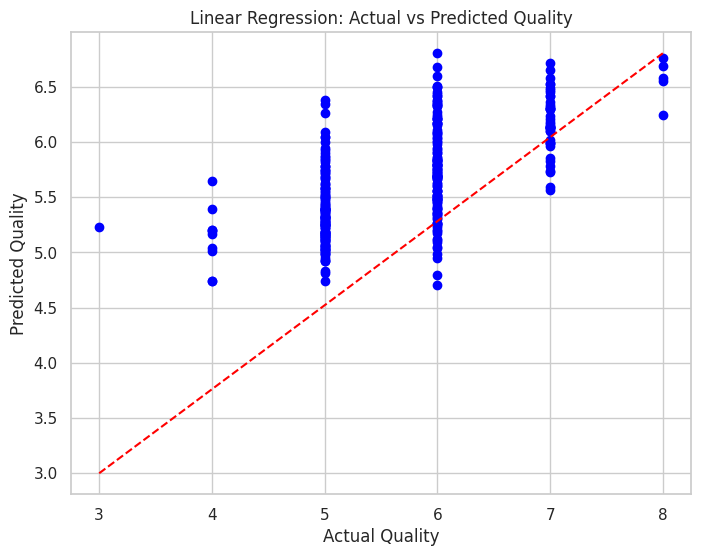


Feature Importance:
                  Feature  Coefficient
10               alcohol     0.296628
9              sulphates     0.146815
5    free sulfur dioxide     0.058015
0          fixed acidity     0.039789
3         residual sugar     0.009421
7                density    -0.019204
2            citric acid    -0.027512
8                     pH    -0.060610
4              chlorides    -0.089084
6   total sulfur dioxide    -0.120008
1       volatile acidity    -0.179439


In [ ]:
# Plot predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, color = "blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(lr_pred)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Linear Regression: Actual vs Predicted Quality')
plt.grid(True)
plt.show()


# Feature Importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})
print("\nFeature Importance:\n", feature_importance.sort_values(by='Coefficient', ascending=False))

In [ ]:
from math import sqrt
# Logistic Regression (requires target variable to be categorical)
# Convert 'quality' to categorical (e.g., good/bad) for logistic regression
data['quality_cat'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0) #classification
x_log = data.drop(['quality', 'quality_cat'], axis = 1)
y_log = data['quality_cat']

x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_log = scaler.fit_transform(x_train_log)
x_test_log = scaler.transform(x_test_log)

logreg = LogisticRegression(max_iter=1000) #Increased max_iter to ensure convergence
logreg.fit(x_train_log, y_train_log)

logreg_pred = logreg.predict(x_test_log)

logreg_pred_prob = logreg.predict_proba(x_test_log)[:, 1]  # Probability of class 1

mse_logreg = mean_squared_error(y_test_log, logreg_pred_prob)
r2_logreg = r2_score(y_test_log, logreg_pred_prob)


print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test_log, logreg_pred))
print("MSE: ", mse_logreg)
print("RMSE:", sqrt(mse_logreg))
print("R-squared:", r2_logreg)
print("\nLogistic Regression: \n", logreg_pred)


Logistic Regression:
Accuracy: 0.865625
MSE:  0.09113329828219288
RMSE: 0.3018829214814791
R-squared: 0.2726950554051477

Logistic Regression: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


### 3. Regression without libraries

In [ ]:
# Linear Regression Without Using the libraries
import numpy as np

class LinearRegression_Custom:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        # Calculate the coefficients using the normal equation
        self.coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        # Predict the target variable using the calculated coefficients
        y_pred = np.dot(X, self.coefficients)
        return y_pred

# Example usage with the provided data
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)
X_test_np = np.array(X_test)

# Initialize and train the custom linear regression model
custom_model = LinearRegression_Custom()
custom_model.fit(X_train_np, y_train_np)

# Make predictions
y_pred_custom = custom_model.predict(X_test_np)

# Evaluate the custom model
rmse_custom = np.sqrt(mean_squared_error(y_test, y_pred_custom))
r2_custom = r2_score(y_test, y_pred_custom)

print("Custom Linear Regression RMSE:", rmse_custom)
print("Custom Linear Regression R-squared:", r2_custom)
print('\nCustom Linear Regression:\n', y_pred_custom)

Custom Linear Regression RMSE: 0.6245199307980139
Custom Linear Regression R-squared: 0.4031803412796202

Custom Linear Regression:
 [5.34666441 5.05631345 5.66446972 5.46451484 5.72518476 5.27928659
 5.03421667 5.12623347 5.74534288 5.68665032 6.13959677 5.23386892
 5.54991474 5.25825299 5.44810502 6.46828999 5.15018088 5.59105157
 6.5560658  5.32255751 5.3918385  5.19610791 5.94475739 6.36197631
 5.35484893 5.41907575 6.36483321 5.35121573 5.172392   6.16987311
 5.25263058 5.50657406 5.75422105 5.39101712 5.45331031 5.02757499
 6.16173243 5.68661555 5.6486077  6.165471   5.52872593 5.24414488
 6.17724727 5.16500868 5.87598332 5.81317121 6.41982782 5.6059474
 5.15232137 5.55634632 5.16044852 5.10449459 5.58371721 6.33425313
 4.95134985 4.98364804 6.01041999 5.40809804 5.83802638 5.2486897
 5.60717482 5.96630957 5.27619063 5.30380113 6.4949309  5.42033967
 6.34273471 5.24618531 6.41317317 5.31237924 6.41746963 4.74315748
 5.79362039 5.8283184  6.17598768 5.29723707 6.76198733 5.8974526

In [ ]:
regressions = {
    'Model': ['Linear Regression', 'Logistic Regression','Custom Linear Regression'],#'Lasso', 'Ridge'],# 'ElasticNet', 'MLP', 'SVR', 'Random Forest', 'Decision Tree'],

    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred)),
                                sqrt(mse_logreg),
                                rmse_custom,],
    'R-squared': [r2_score(y_test, y_pred),
                  r2_logreg,
                  r2_custom,]
}

results_regression = pd.DataFrame(regressions)
print(results_regression)


                      Model      RMSE  R-squared
0         Linear Regression  0.656614   0.340262
1       Logistic Regression  0.301883   0.272695
2  Custom Linear Regression  0.624520   0.403180


### 3. Reguralization

In [ ]:
# Define alphas for tuning regularization strength
alphas = [0.01, 0.1, 0.5, 1, 10, 100]

# Store results for analysis
results = {"Model": [], "Alpha": [], "RMSE": [], "R_squared": []}

# Ridge Regression (L2 Regularization)
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    r2 = r2_score(y_test, y_pred_ridge)

    results["Model"].append(f"Ridge (alpha = {alpha})")
    results["Alpha"].append(alpha)
    results["RMSE"].append(rmse)
    results["R_squared"].append(r2)
# Lasso Regression (L1 Regularization)
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
    r2 = r2_score(y_test, y_pred_lasso)

    results["Model"].append(f"Lasso (alpha = {alpha})")
    results["Alpha"].append(alpha)
    results["RMSE"].append(rmse)
    results["R_squared"].append(r2)

# ElasticNet (Combination of L1 and L2 Regularization)
for alpha in alphas:
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=0.5)  # l1_ratio balances L1 and L2
    elastic_net.fit(X_train, y_train)
    y_pred_elastic_net = elastic_net.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
    r2 = r2_score(y_test, y_pred_elastic_net)

    results["Model"].append(f"ElasticNet (alpha = {alpha}, L1 ratio = 0.5) ")
    results["Alpha"].append(alpha)
    results["RMSE"].append(rmse)
    results["R_squared"].append(r2)

# Convert results to DataFrame for analysis
import pandas as pd
results_regu = pd.DataFrame(results)
print(results_regu)

                                         Model   Alpha      RMSE  R_squared
0                         Ridge (alpha = 0.01)    0.01  0.624520   0.403180
1                          Ridge (alpha = 0.1)    0.10  0.624521   0.403178
2                          Ridge (alpha = 0.5)    0.50  0.624525   0.403171
3                            Ridge (alpha = 1)    1.00  0.624530   0.403161
4                           Ridge (alpha = 10)   10.00  0.624641   0.402948
5                          Ridge (alpha = 100)  100.00  0.626655   0.399093
6                         Lasso (alpha = 0.01)    0.01  0.626909   0.398605
7                          Lasso (alpha = 0.1)    0.10  0.662740   0.327894
8                          Lasso (alpha = 0.5)    0.50  0.810654  -0.005592
9                            Lasso (alpha = 1)    1.00  0.810654  -0.005592
10                          Lasso (alpha = 10)   10.00  0.810654  -0.005592
11                         Lasso (alpha = 100)  100.00  0.810654  -0.005592
12  ElasticN

/tmp/ipykernel_513021/3163318488.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_513021/3163318488.py:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




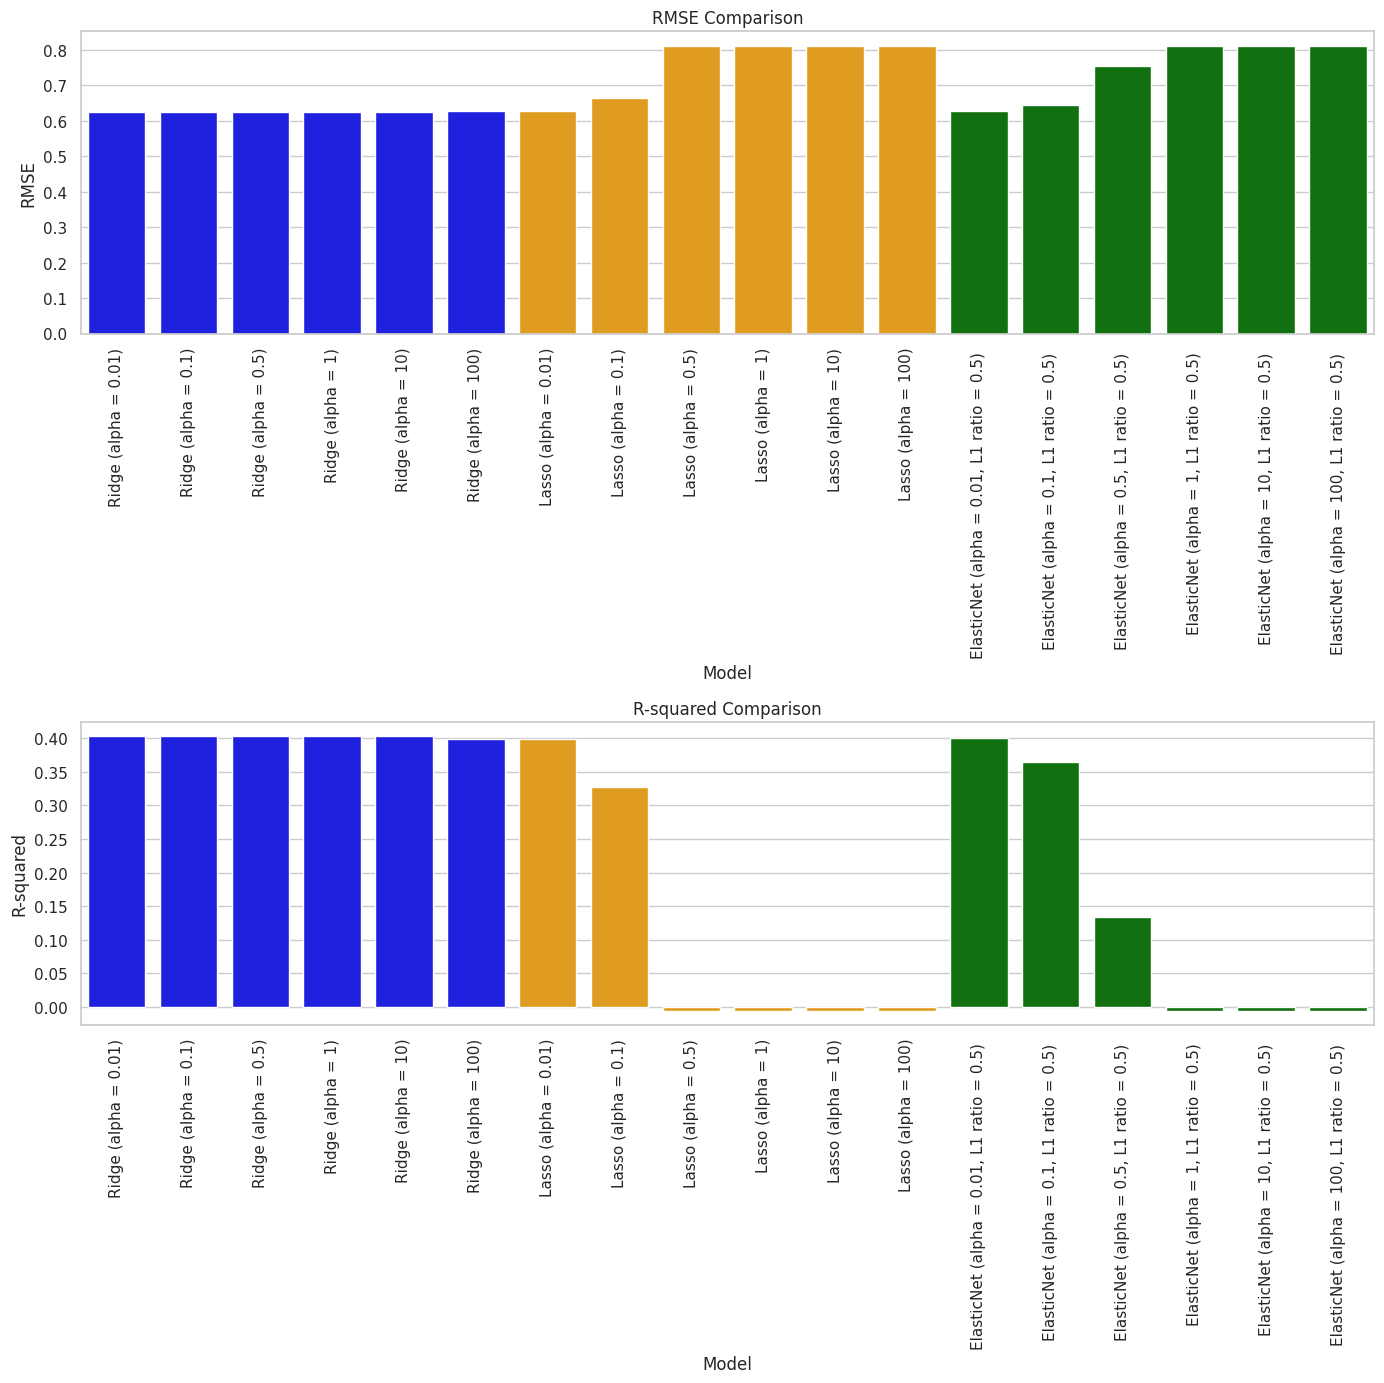

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

model_colors = {
    'Ridge': 'blue',
    'Lasso': 'orange',
    'ElasticNet': 'green'
}

results_regu['Color'] = results_regu['Model'].apply(lambda x: model_colors['Ridge'] if 'Ridge' in x
                                                 else (model_colors['Lasso'] if 'Lasso' in x
                                                       else model_colors['ElasticNet']))
palette_dict = dict(zip(results_regu['Model'], results_regu['Color']))

# Create a figure with two subplots: one for RMSE and one for R^2
fig, axes = plt.subplots(2, 1, figsize=(14, 14))

# Plot RMSE
sns.barplot(x="Model", y="RMSE", data=results_regu, ax=axes[0], palette=palette_dict)
axes[0].set_title("RMSE Comparison")
axes[0].set_xlabel("Model")
axes[0].set_ylabel("RMSE")
axes[0].tick_params(axis="x", rotation=90)  # Rotate x labels for better readability

# Plot R^2
sns.barplot(x="Model", y="R_squared", data=results_regu, ax=axes[1], palette=palette_dict)
axes[1].set_title("R-squared Comparison")
axes[1].set_xlabel("Model")
axes[1].set_ylabel("R-squared")
axes[1].tick_params(axis="x", rotation=90)  # Rotate x labels for better readability

# Adjust layout for better visualization
plt.tight_layout()
# Show the plots
plt.show()


Ridge:

Tends to perform better when most features contribute to the target variable.

More stable and less sensitive to small changes in the dataset.

Lasso:

Provides simpler models with fewer predictors, which may perform better when only a subset of features is relevant.

Can sometimes underperform if all features contribute significantly.

ElasticNet:

A good default choice when unsure about the nature of the dataset.

Tends to perform better on datasets with both irrelevant features and multicollinearity.


In [ ]:
models = {}
for alpha in alphas:
    models[f"Ridge (alpha={alpha})"] = Ridge(alpha=alpha)

for alpha in alphas:
    models[f"Lasso (alpha={alpha})"] = Lasso(alpha=alpha)

for alpha in alphas:
    models[f"ElasticNet (alpha={alpha}, l1_ratio=0.5)"] = ElasticNet(alpha=alpha, l1_ratio=0.5)

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

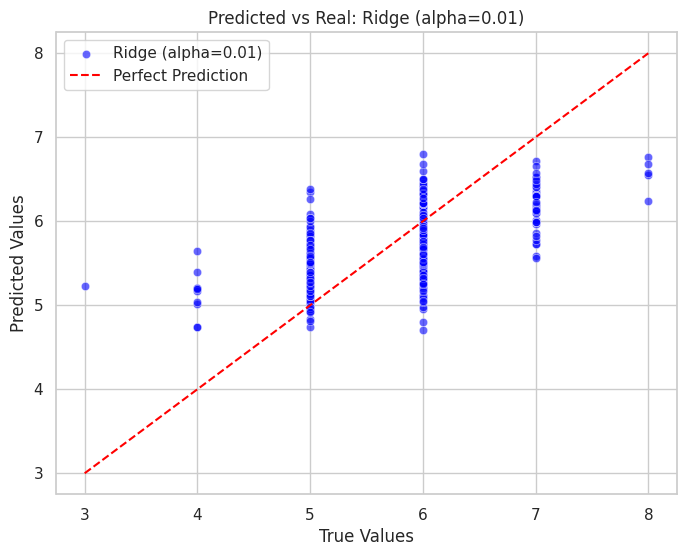

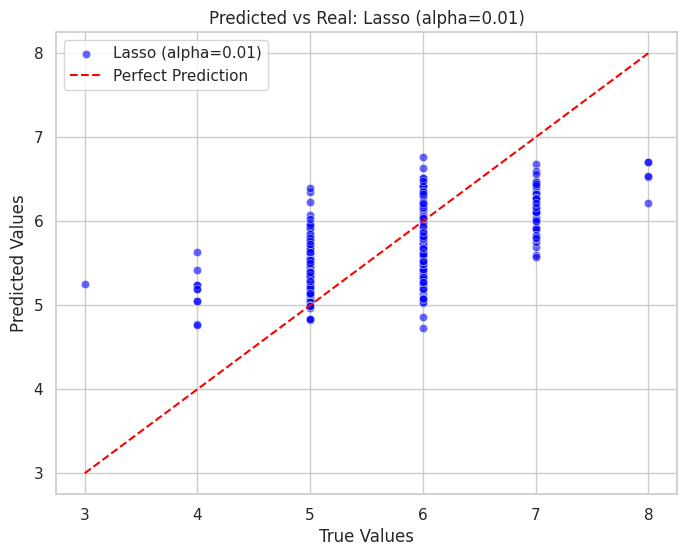

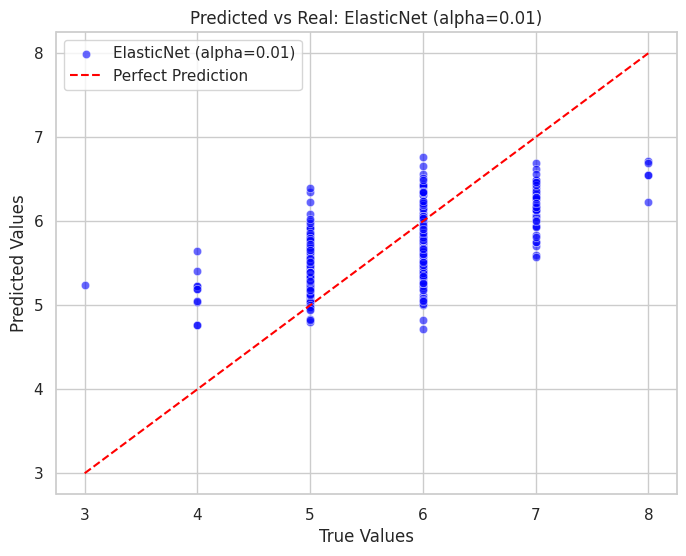

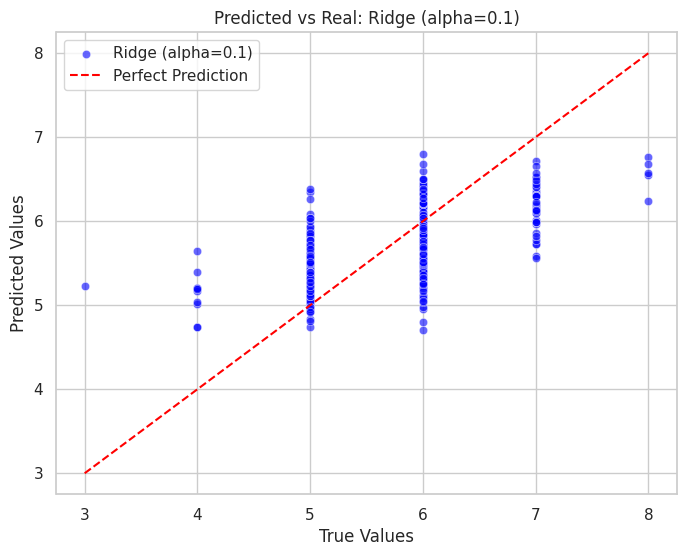

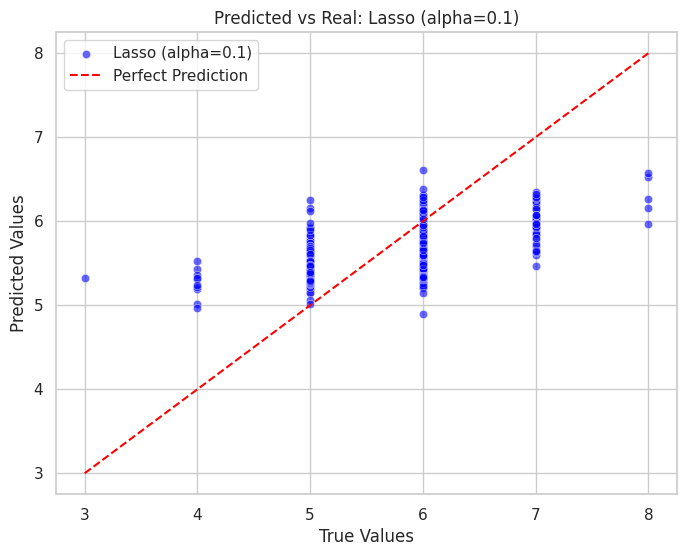

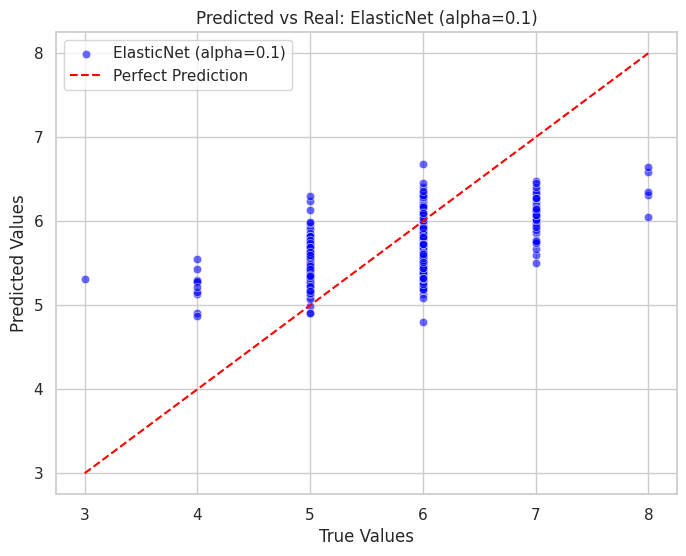

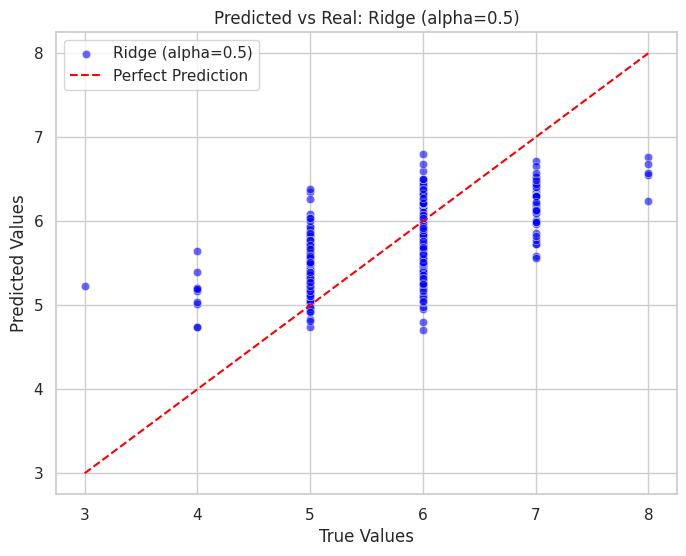

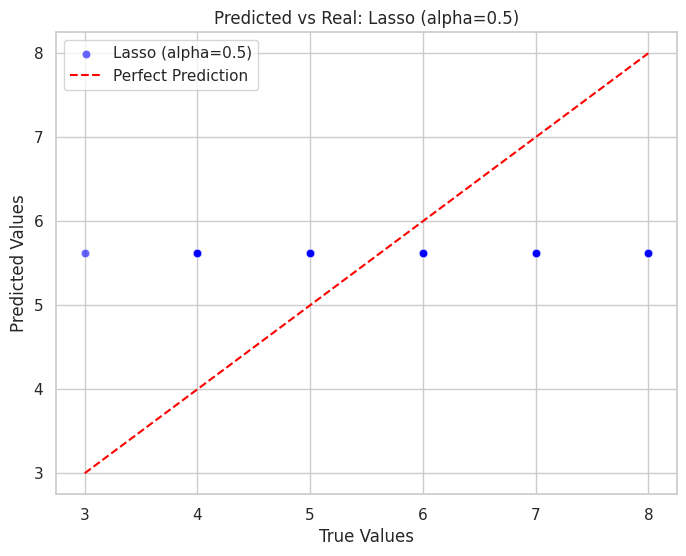

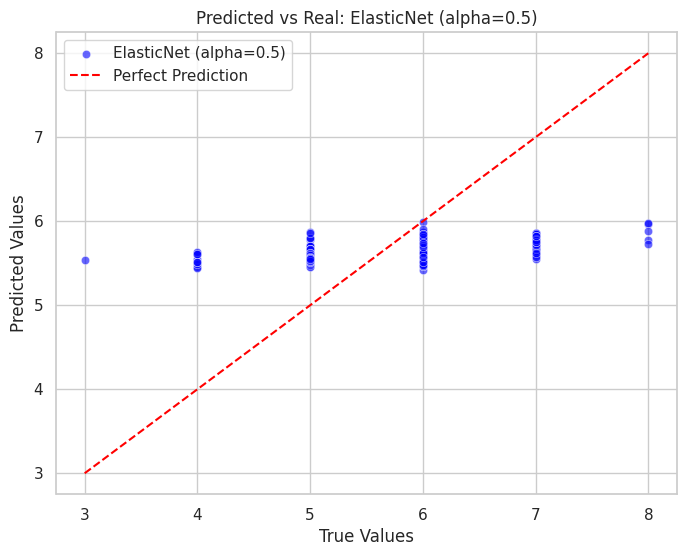

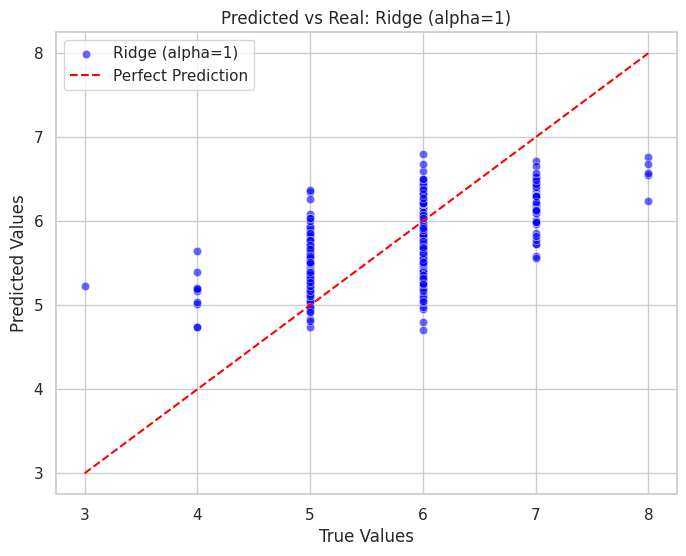

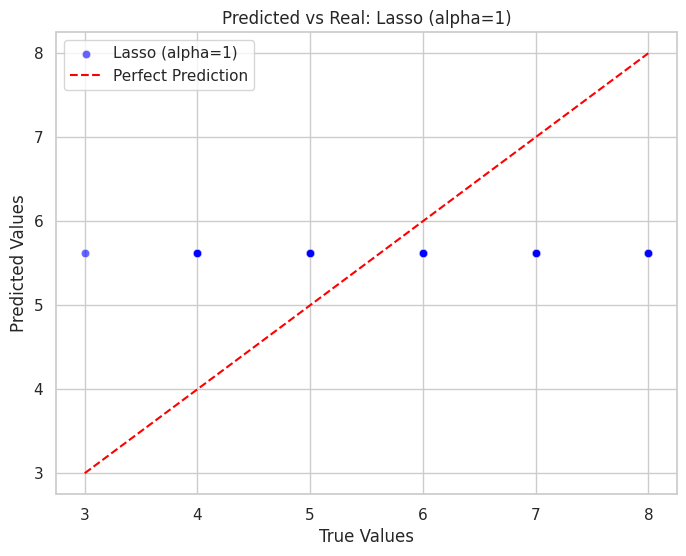

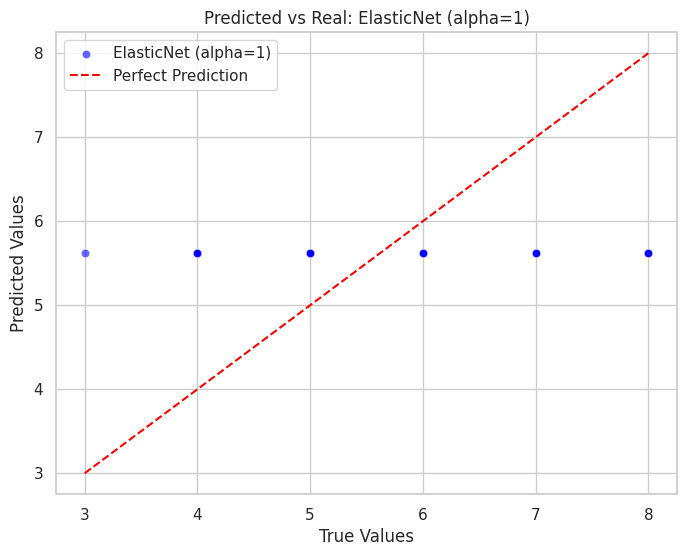

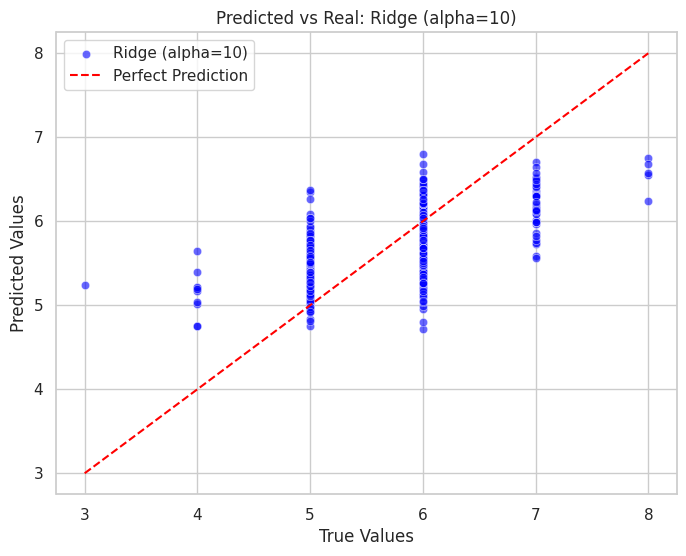

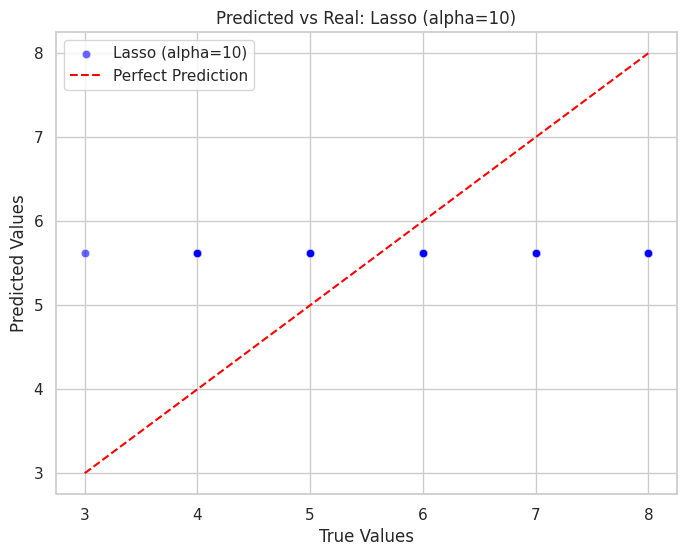

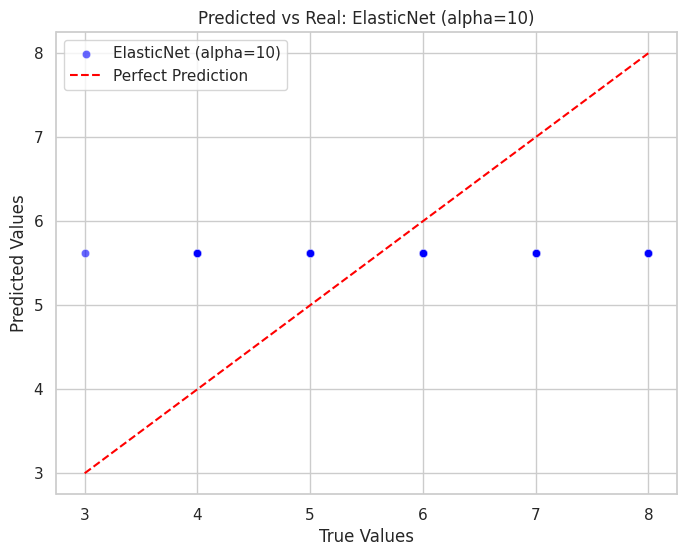

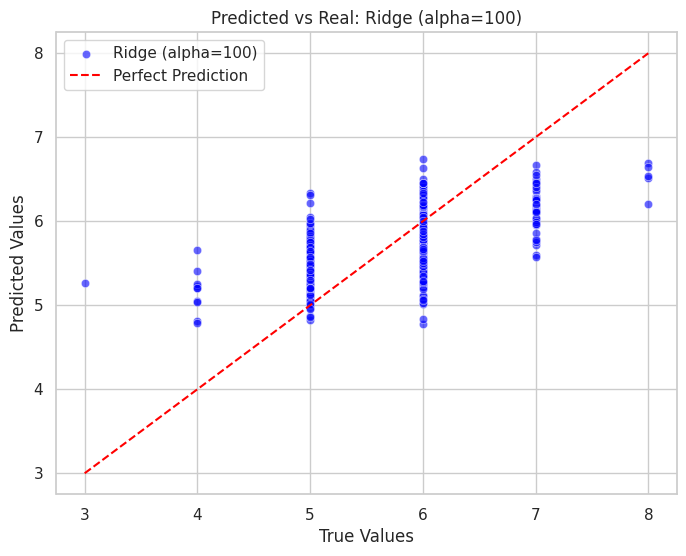

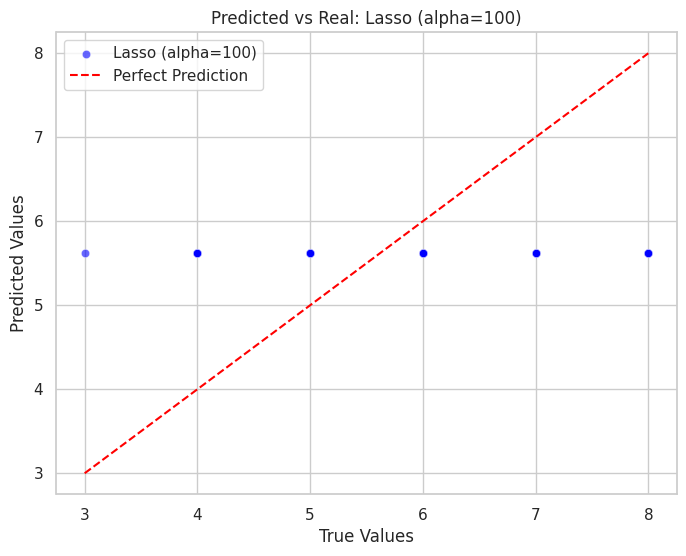

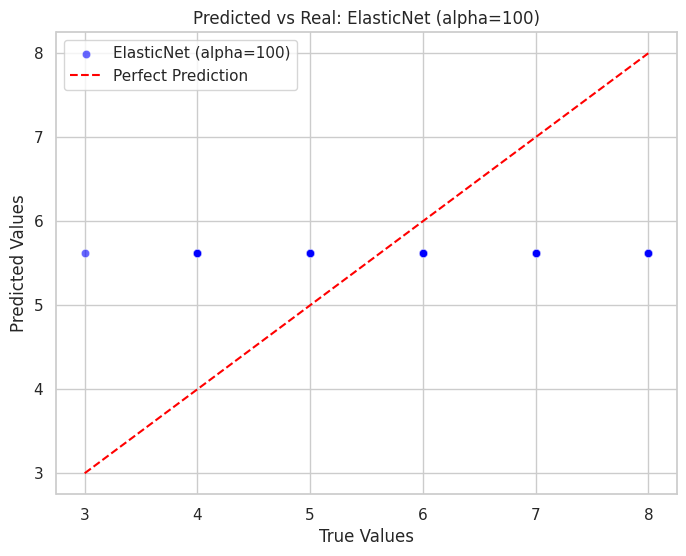

In [ ]:
# Function to plot predicted vs real values
def plot_predicted_vs_real(model, X_test, y_test, model_name, alpha_value):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label=f'{model_name} (alpha={alpha_value})')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
    plt.title(f"Predicted vs Real: {model_name} (alpha={alpha_value})")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()

# Plot Predicted vs Real values for all models
for alpha in alphas:
    # Ridge model for the current alpha
    ridge = models[f"Ridge (alpha={alpha})"]
    plot_predicted_vs_real(ridge, X_test, y_test, 'Ridge', alpha)

    # Lasso model for the current alpha
    lasso = models[f"Lasso (alpha={alpha})"]
    plot_predicted_vs_real(lasso, X_test, y_test, 'Lasso', alpha)

    # ElasticNet model for the current alpha
    elastic_net = models[f"ElasticNet (alpha={alpha}, l1_ratio=0.5)"]
    plot_predicted_vs_real(elastic_net, X_test, y_test, 'ElasticNet', alpha)

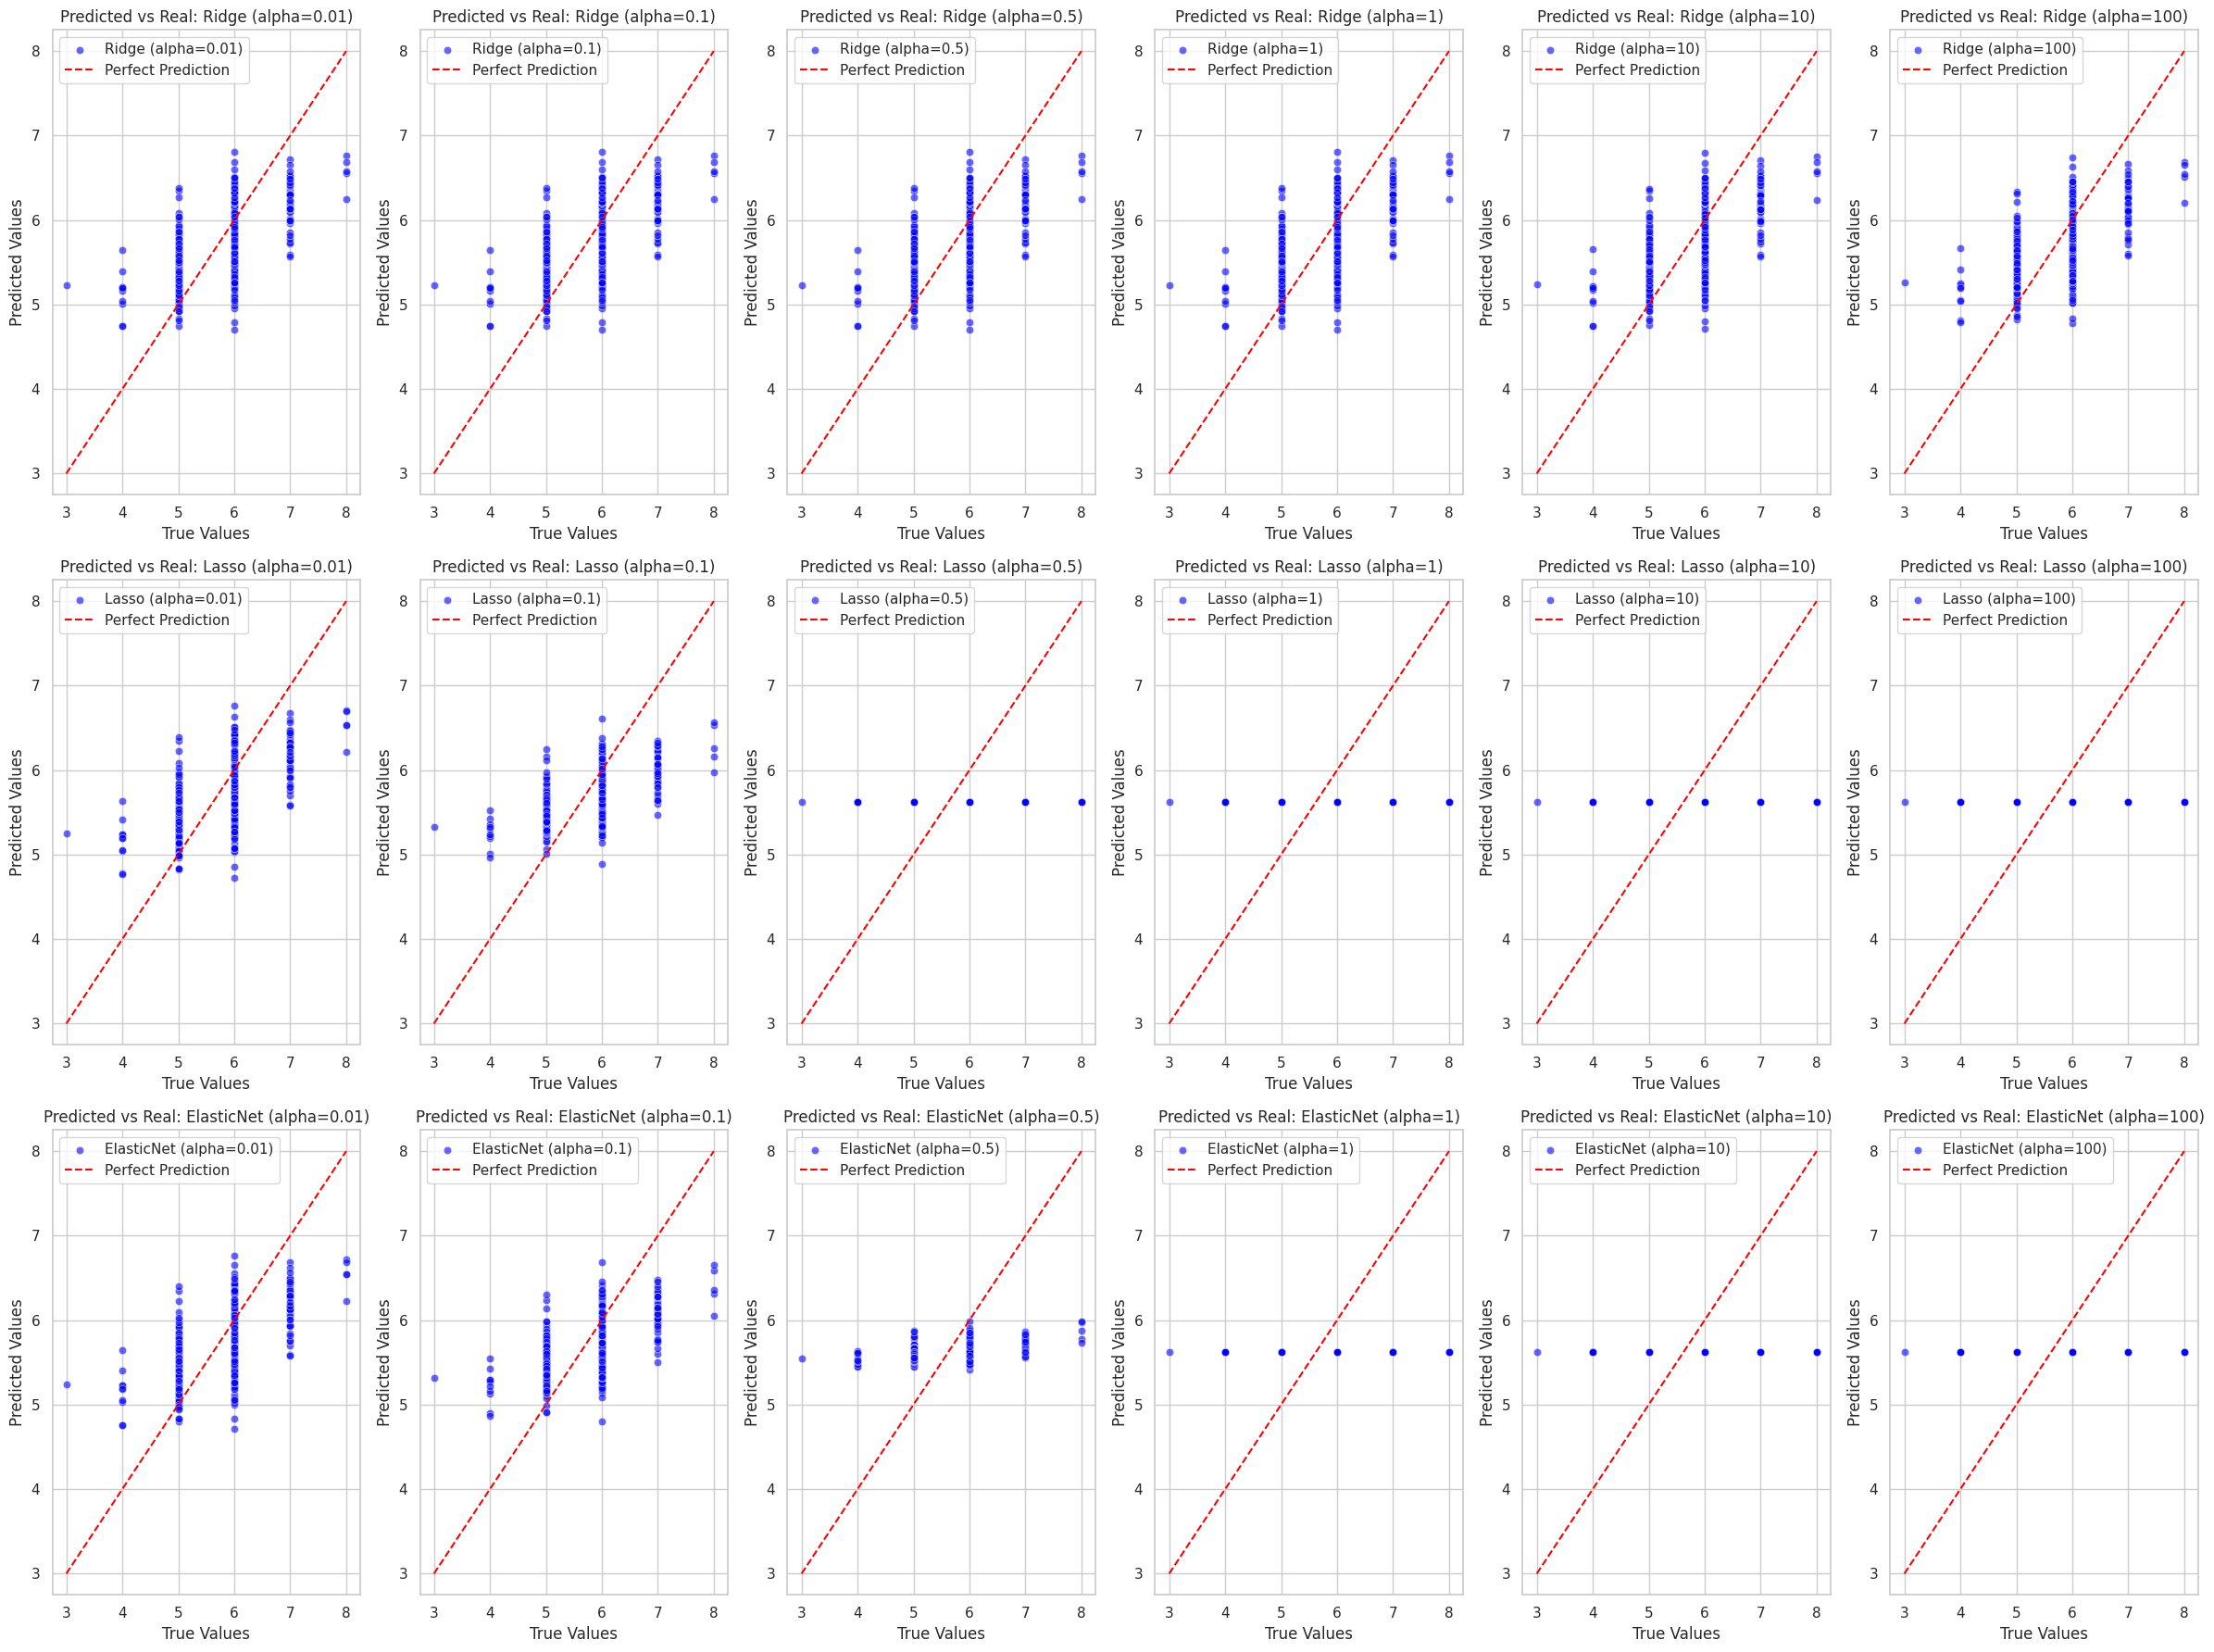

In [ ]:
def plot_predicted_vs_real(model, X_test, y_test, model_name, alpha_value, ax):
    y_pred = model.predict(X_test)
    sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, label=f'{model_name} (alpha={alpha_value})', ax=ax)
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
    ax.set_title(f"Predicted vs Real: {model_name} (alpha={alpha_value})")
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predicted Values")
    ax.legend()

# Create a figure with subplots: 3 rows, 6 columns (18 plots total)
fig, axes = plt.subplots(3, 6, figsize=(24, 18))  # Adjust the size to fit the plots nicely
axes = axes.flatten()  # Flatten the 2D array of axes into a 1D array for easier indexing

# Plot Predicted vs Real values for all models using subplots
index = 0
for alpha in alphas:
    # Ridge model for the current alpha
    ridge = models[f"Ridge (alpha={alpha})"]
    plot_predicted_vs_real(ridge, X_test, y_test, 'Ridge', alpha, axes[index])
    index += 1

for alpha in alphas:
    # Lasso model for the current alpha
    lasso = models[f"Lasso (alpha={alpha})"]
    plot_predicted_vs_real(lasso, X_test, y_test, 'Lasso', alpha, axes[index])
    index += 1

for alpha in alphas:
    # ElasticNet model for the current alpha
    elastic_net = models[f"ElasticNet (alpha={alpha}, l1_ratio=0.5)"]
    plot_predicted_vs_real(elastic_net, X_test, y_test, 'ElasticNet', alpha, axes[index])
    index += 1

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### 4. Multilayer Neural Network

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
         Architecture      RMSE
0                [64]  0.605166
1            [64, 32]  0.650346
2       [128, 64, 32]  0.675554
3  [256, 128, 64, 32]  0.711936


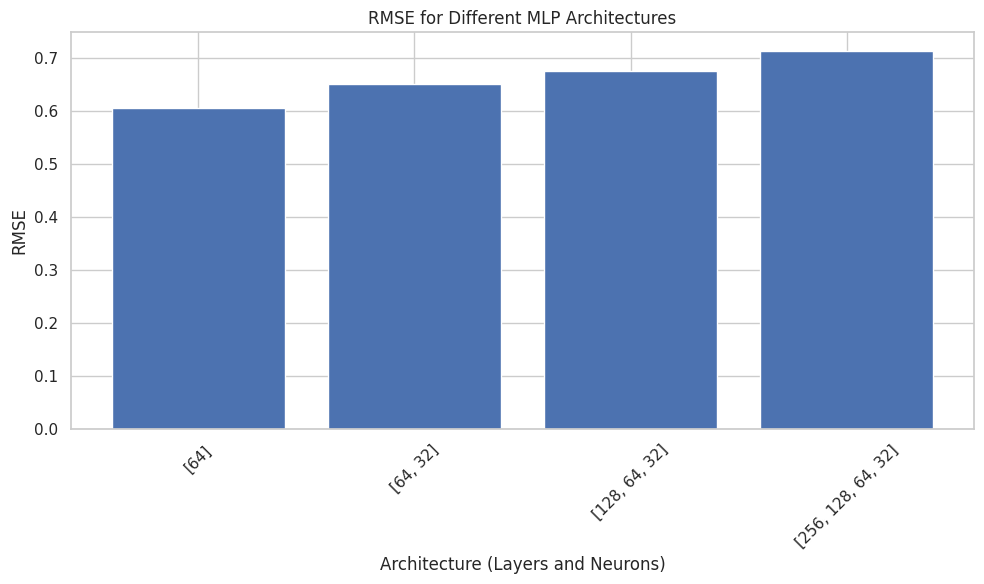

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Function to create and compile a model with different architectures
def create_mlp_model(layers_list):
    model = keras.Sequential()
    model.add(layers.InputLayer(shape=(X_train.shape[1],)))  # Input layer
    for neurons in layers_list:
        model.add(layers.Dense(neurons, activation='relu'))  # Hidden layers
    model.add(layers.Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error')  # Adam optimizer and MSE loss
    return model

# Different architectures to test (varying the number of layers and neurons)
architectures = [
    [64],  # 1 layer, 64 neurons
    [64, 32],  # 2 layers, 64 and 32 neurons
    [128, 64, 32],  # 3 layers, 128, 64, and 32 neurons
    [256, 128, 64, 32],  # 4 layers, 256, 128, 64, and 32 neurons
]

# Train and evaluate the models
results = []
for arch in architectures:
    model = create_mlp_model(arch)
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)  # Train the model
    y_pred = model.predict(X_test).flatten()  # Make predictions
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Calculate RMSE
    results.append((arch, rmse))

# Display results in a DataFrame
results_nn = pd.DataFrame(results, columns=['Architecture', 'RMSE'])
print(results_nn)

# Plot the results
plt.figure(figsize=(10, 6))
architectures_str = [str(arch) for arch in results_nn['Architecture']]
plt.bar(architectures_str, results_nn['RMSE'])
plt.title("RMSE for Different MLP Architectures")
plt.xlabel("Architecture (Layers and Neurons)")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Data Preprocessing:
1. We load the red wine dataset and split it into features (X) and target (y).
The features are standardized using StandardScaler, as neural networks typically perform better with normalized data.
The data is split into training and testing sets using train_test_split (80% training, 20% testing).

3. MLP Model Creation:

We define a function create_mlp_model() that takes a list of layer configurations (number of neurons in each layer). This function creates a model with the specified layers.
The model uses ReLU activation for the hidden layers and a linear activation function in the output layer (since it’s a regression task).

3. Model Training and Evaluation:

We define different architectures to test, varying the number of layers and neurons.
For each architecture, we train the model for 100 epochs with a batch size of 32. The model is then evaluated using RMSE (Root Mean Squared Error) on the test set.

4. Results Visualization:

We store the RMSE for each architecture in the results list, which is then converted into a pandas DataFrame for easy analysis.
A bar plot is generated to compare the RMSE across different architectures. The x-axis shows the architecture configurations, and the y-axis shows the RMSE.

### 5. Other methods, but you must describe it mathematically (for example, SVM, RandomForest, ...)

### 1. SVM
SVM aims to find a hyperplane that maximally separates data points into classes (for classification) or fits data points with minimal error (for regression).


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train and evaluate SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Radial basis kernel
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate SVR
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR RMSE: {rmse_svr:.2f}, R_squared: {r2_svr:.2f}")


SVR RMSE: 0.59, R_squared: 0.46


### 2. Random forest

Random Forest is an ensemble learning method that builds multiple decision trees and averages their predictions for regression tasks.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train and evaluate Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}, R_squared: {r2_rf:.2f}")


Random Forest RMSE: 0.55, R_squared: 0.54


### 3. Decision Tree
Decision Tree Regression splits data into subsets based on feature values to minimize error in predictions. It uses metrics like:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train and evaluate Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42, max_depth=5)  # Set max depth for interpretability
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

# Evaluate Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree RMSE: {rmse_dt:.2f}, R_squared: {r2_dt:.2f}")


Decision Tree RMSE: 0.66, R_squared: 0.34


Captures non-linear relationships well and is easy to interpret with limited depth.
May overfit if the tree grows too deep, so tuning parameters like max_depth is crucial.

In [ ]:
results_others= {
    "Model": ["SVR", "Random Forest", "Decision Tree"],
    "RMSE": [rmse_svr, rmse_rf, rmse_dt],
    "R_squared": [r2_svr, r2_rf, r2_dt]
}

results_other = pd.DataFrame(results_others)
results_other

Model      RMSE  R_squared
0            SVR  0.592768   0.462324
1  Random Forest  0.548325   0.539927
2  Decision Tree  0.658415   0.336640

Comparison:

SVR: Handles small noise well and works effectively on datasets with fewer features. Random Forest: Reduces variance using ensembles but can be computationally expensive for very large datasets.
Decision Tree: Simple and interpretable but prone to overfitting without parameter tuning.

# Summary

**Best Model for Predicting**

**Random Forest** is the overall best model as it counts with the lowest RMSE whild having the highest R-squared


**Regularixation Effectiveness** Ridge, Lasso and ElasticNet show improvements over linear regression but do not outperform tree-based models or SVR.

**Neural Networks** Smaller architectures perform better than deeoer ones suggesting simplicity for the dataset.